# Instagram Reach Analysis

Here we would analyze the reach of [Clever Programmer's Instagram account](https://www.instagram.com/the.clever.programmer/) based on the data collected and provided by himself.

In [1]:
# Data wrangling
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

# Getting rid of soon-to-be-deprecated warnings
import warnings
warnings. simplefilter(action='ignore', category=FutureWarning)

*Since I am testing Python 3.10, I need to make sure the correct environment and Python version are running*

In [2]:
# Checking Python version
import sys
print(sys.version)

3.10.4 | packaged by conda-forge | (main, Mar 24 2022, 17:32:50) [MSC v.1929 64 bit (AMD64)]


## Data Preparation

In [3]:
# Reading the dataset
data = pd.read_csv("Instagram.csv", encoding="latin1") #passing the encoding to avoid encoding error we get otherwise
data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920.0,2586.0,1028.0,619.0,56.0,98.0,9.0,5.0,162.0,35.0,2.0,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394.0,2727.0,1838.0,1174.0,78.0,194.0,7.0,14.0,224.0,48.0,10.0,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021.0,2085.0,1188.0,0.0,533.0,41.0,11.0,1.0,131.0,62.0,12.0,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528.0,2700.0,621.0,932.0,73.0,172.0,10.0,7.0,213.0,23.0,8.0,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518.0,1704.0,255.0,279.0,37.0,96.0,5.0,4.0,123.0,8.0,0.0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [4]:
# Checking for null values
data.isnull().sum()

Impressions       1
From Home         1
From Hashtags     1
From Explore      1
From Other        1
Saves             1
Comments          1
Shares            1
Likes             1
Profile Visits    1
Follows           1
Caption           1
Hashtags          1
dtype: int64

In [5]:
# Dropping null values
data = data.dropna()

In [6]:
# Checking data types in all columns
data.info()
#data.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Impressions     99 non-null     float64
 1   From Home       99 non-null     float64
 2   From Hashtags   99 non-null     float64
 3   From Explore    99 non-null     float64
 4   From Other      99 non-null     float64
 5   Saves           99 non-null     float64
 6   Comments        99 non-null     float64
 7   Shares          99 non-null     float64
 8   Likes           99 non-null     float64
 9   Profile Visits  99 non-null     float64
 10  Follows         99 non-null     float64
 11  Caption         99 non-null     object 
 12  Hashtags        99 non-null     object 
dtypes: float64(11), object(2)
memory usage: 10.8+ KB


## Reach analysis

Looking at distribution of impressions received from Home section of Instagram to see how well the posts are reaching the followers.

Two graphs are used due to the fact that despite function `displot` still works, it will be deprecated in the future versions of seaborn. Thus `histplot` will be surely working in the future.

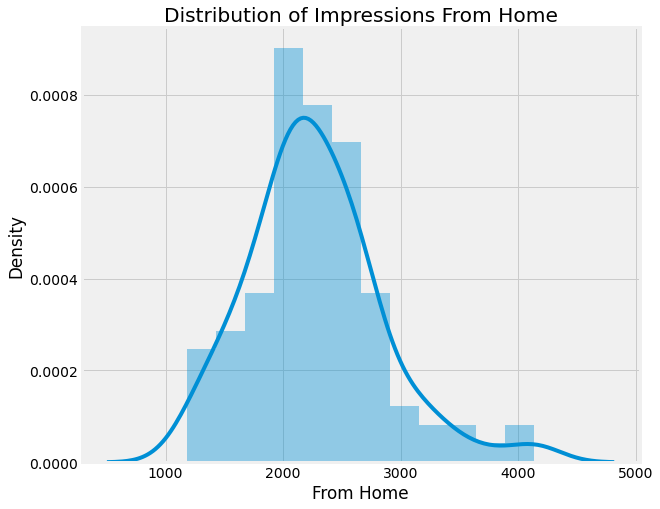

In [7]:
# Old method with soon-to-be-deprecated distplot
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

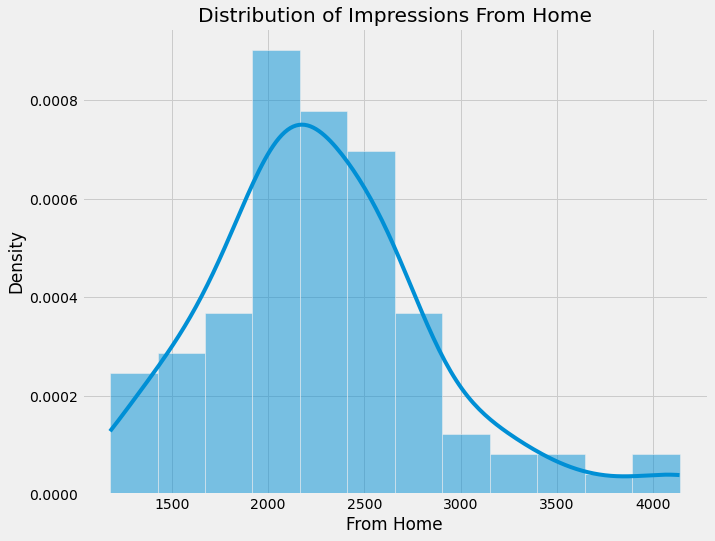

In [25]:
# Using a newer seaborn histplot
plt.figure(figsize=(10, 8))
#plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.histplot(data['From Home'], kde=True, stat = "density")
plt.show()

Now let's have a look at the distribution of impressions from hashtags.

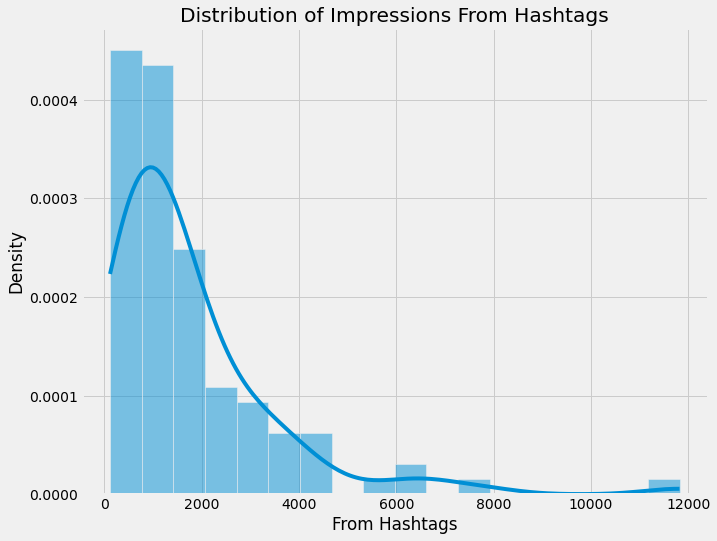

In [8]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.histplot(data['From Hashtags'], kde=True, stat = "density")
plt.show()

Despite hashtags impressions are showing that not all posts could be reached using hashtags, they are, at least, helpful when attracting new users.

Perhaps, the impressions from the Explore section would show something more insightful.

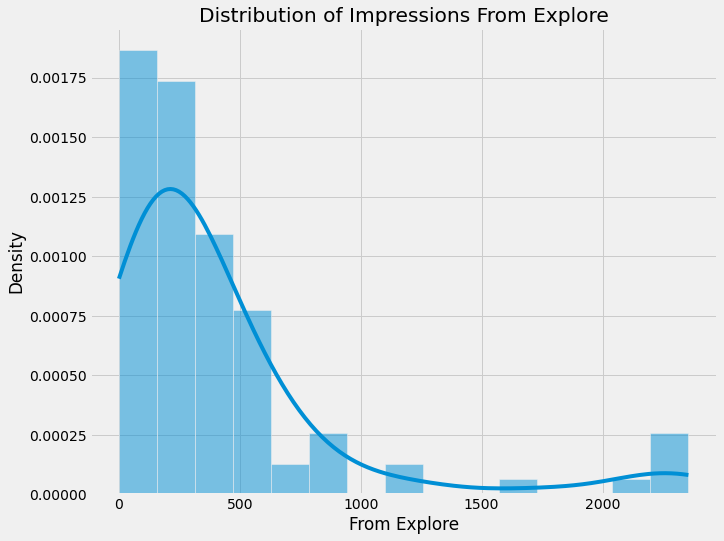

In [9]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.histplot(data['From Explore'], kde=True, stat = "density")
plt.show()

Unfortunately, the impressions from the Explore section show that even less posts are recommended by Instagram and reached by new users compared to the ones reached via hashtags.

Now, let's have a look at the percentage of impressions got from all the various sources on Instagram.

In [13]:
labels = ['From Home','From Hashtags','From Explore','Other']

values = [data["From Home"].sum(), data["From Hashtags"].sum(), data["From Explore"].sum(), data["From Other"].sum()]

fig = px.pie(data, values=values, names=labels, title='Impressions on Instagram posts from various sources', hole=0.3)
fig.show()

Now it is obvious that almost half of the total reach (49.7%) comes from the followers and a great margin (38.1%) is attracted by hashtags. The rest is the minority coming from the Explore section and the other sources.

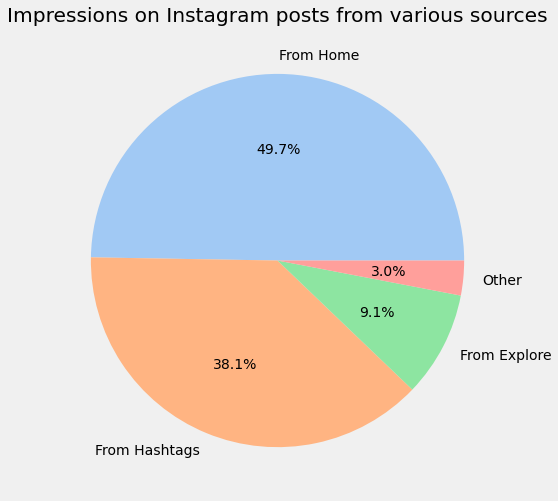

In [20]:
plt.figure(figsize=(10, 8))
plt.pie(values, labels = labels, colors = sns.color_palette('pastel')[0:5], autopct="%.1f%%")
plt.title("Impressions on Instagram posts from various sources")
plt.show()

## Analyzing posts' content

The content of the post is described via two columns: caption and hastags. To better understand the content of the posts it might be a good idea to have a look at word clouds built from said columns.

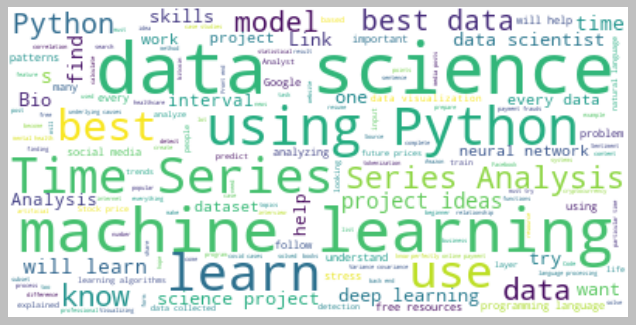

In [23]:
text = " ".join(i for i in data["Caption"])

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.style.use('classic')
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

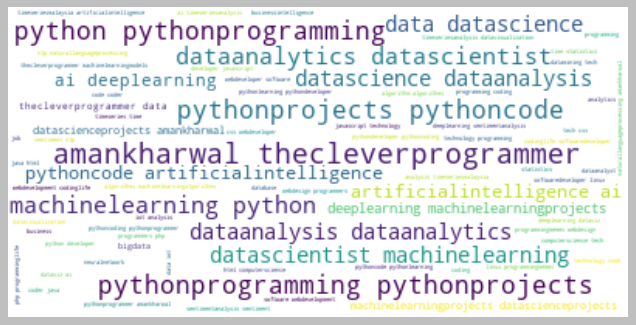

In [26]:
text = " ".join(i for i in data["Hashtags"])

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Analyzing impact

Now, let's have a look at which features have the biggest impact on impressions. For this we will build a correlation matrix, as well as, trend lines.

In [31]:
data.corr()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
Impressions,1.000000,0.603378,0.892682,0.498389,0.429227,0.625600,0.247201,0.476617,0.896277,0.774393,0.804064
From Home,0.603378,1.000000,0.247775,0.627201,0.253017,0.751234,0.404574,0.619734,0.753177,0.318869,0.484809
From Hashtags,0.892682,0.247775,1.000000,0.117056,0.264955,0.321904,0.189838,0.250159,0.715534,0.793107,0.678926
From Explore,0.498389,0.627201,0.117056,1.000000,0.299308,0.748407,0.033685,0.531271,0.537275,0.143380,0.431809
From Other,0.429227,0.253017,0.264955,0.299308,1.000000,0.248961,-0.082457,0.085182,0.336636,0.437586,0.588807
Saves,0.625600,0.751234,0.321904,0.748407,0.248961,1.000000,0.137822,0.744239,0.761749,0.181447,0.396706
Comments,0.247201,0.404574,0.189838,0.033685,-0.082457,0.137822,1.000000,0.182959,0.307451,0.205561,0.104389
Shares,0.476617,0.619734,0.250159,0.531271,0.085182,0.744239,0.182959,1.000000,0.575453,0.174526,0.301200
Likes,0.896277,0.753177,0.715534,0.537275,0.336636,0.761749,0.307451,0.575453,1.000000,0.586680,0.638916
Profile Visits,0.774393,0.318869,0.793107,0.143380,0.437586,0.181447,0.205561,0.174526,0.586680,1.000000,0.872862


In [32]:
data.corr()["Impressions"].sort_values(ascending=False)

Impressions       1.000000
Likes             0.896277
From Hashtags     0.892682
Follows           0.804064
Profile Visits    0.774393
Saves             0.625600
From Home         0.603378
From Explore      0.498389
Shares            0.476617
From Other        0.429227
Comments          0.247201
Name: Impressions, dtype: float64

<AxesSubplot:xlabel='Impressions', ylabel='Saves'>

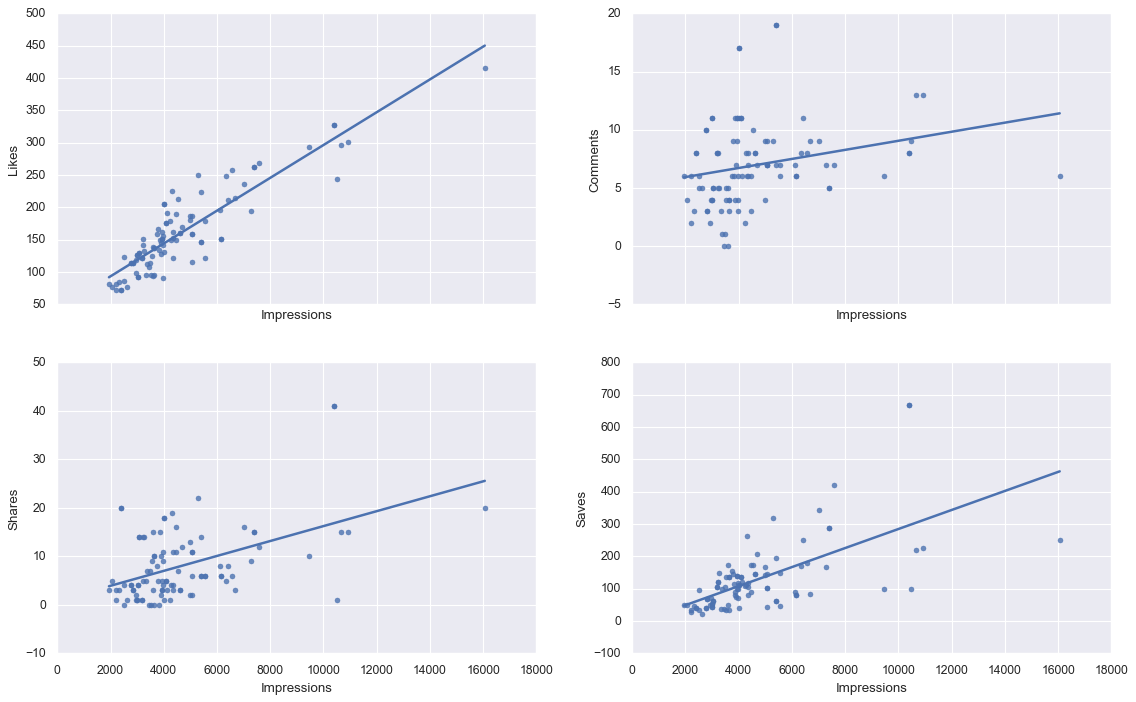

In [46]:
sns.set_theme(color_codes=True)

fig, axs = plt.subplots(2, 2, sharex=True, figsize=(17, 10))
sns.regplot(data=data, x="Impressions", y="Likes", ci=None, ax=axs[0,0])
sns.regplot(data=data, x="Impressions", y="Comments", ci=None, ax=axs[0,1])
sns.regplot(data=data, x="Impressions", y="Shares", ci=None, ax=axs[1,0])
sns.regplot(data=data, x="Impressions", y="Saves", ci=None, ax=axs[1,1])

From the correlation matrix and list, as well as, the graphs we see that there is a strong linear relationship between the Impressions and Likes. In addition, there is a moderate linear relationship between the Impressions and Saves. As for the Comments and Shares, we see that those do not really impact the reach as much as we would prefer them to. High number of shares, though, can lead to a better reach, while low number of shares doesn't.

## Instagram conversion rate

The conversion rate in Instagram shows how many people of those who visited the profile started following it after that.

The formula goes as follows: $ Conversion\;rate = (\frac{Follows}{Profile\;visits} \times 100) $

In [47]:
# Calculating conversion rate of the account
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(round(conversion_rate, 2))

31.18


Text(0.5, 1.0, 'Relationship between profile visits and followers gained')

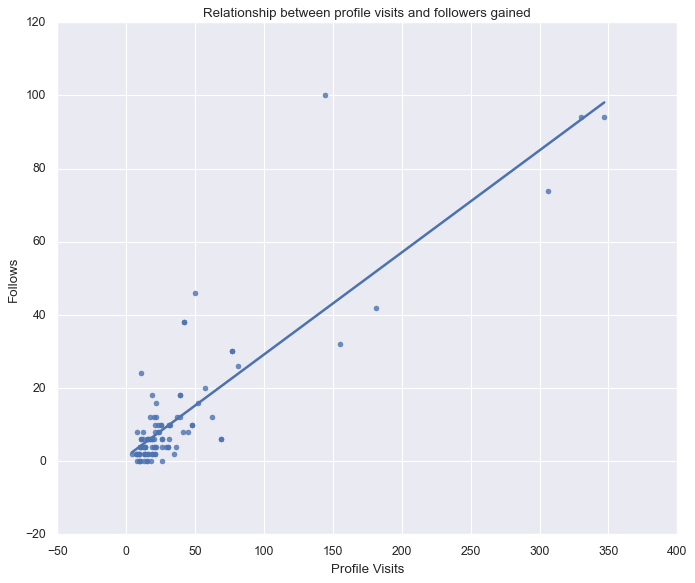

In [52]:
plt.figure( figsize=(10, 8))
sns.regplot(data=data, x="Profile Visits", y="Follows", ci=None)
plt.title("Relationship between profile visits and followers gained")

With the conversion rate of 31% and a linear relationship between profile visits and the number of followers we could say that the account in terms of the content is doing pretty all right and can attract the users.

## Building a simple reach prediction model

In [53]:
# Train-test split
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [57]:
# Building a model
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.9524071208754032

A decent score. Now, let's try to predict the reach of the post by providing inputs to the model manually.

`Likes, Saves, Comments, Shares, Profile visits, Follows`

In [58]:
features = np.array([[172.0, 72.0, 8.0, 12.0, 121.0, 42.0]])
model.predict(features)

array([6977.93647954])